<a href="https://colab.research.google.com/github/EmelyBS/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project_of_Airline_Customer_Reviews_(B_Sc_)_EmelYarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis Project of Airline Customer Reviews**


---


> *Student Names: Emely Ben-Sadon and Yarin Horev*
> *, Supervisor: Dr. Dima Alberg*

> *Sami Shamoon College, Industrial Engineering and Management,
> Submission Date: 2024/2025*



---


This bachelors project explores airline customer reviews from Skytrax using a range of models, from simple to advanced. It begins with basic sentiment analysis using VADER, then moves to a Naive Bayes model for categorizing reviews. Finally, it incorporates BERT, a state-of-the-art deep learning model, to provide more accurate and sophisticated sentiment predictions. The project also investigates correlations between factors like seat comfort, staff service, and overall ratings, presenting insights through visualizations.




  



#**1. Initialization**

---



In [154]:
# LIBRARIES

# For Basic Data Preprocessing and Manipulation:
import pandas as pd  # For data manipulation and preprocessing
import seaborn as sns  # For creating statistical plots
import numpy as np  # For numerical computations, array manipulations

# For Graphs and Visualization
import matplotlib.pyplot as plt  # For creating basic plots


# For generating Word Clouds and Text Analysis:
from wordcloud import WordCloud, STOPWORDS  # For creating word cloud graphs
import nltk  # For natural language processing tasks
from nltk.corpus import stopwords  # Provides stopwords for text preprocessing
from collections import Counter  # For counting word frequencies

# For Data Preparation and Advanced NLP Features:
import spacy  # For advanced NLP features like lemmatization and tokenization
import string  # Provides string-related constants and operations

# For VADER
import re

# For Naive Bayes
from imblearn.over_sampling import RandomOverSampler  # For oversampling imbalanced classes (positive, negative, neutral)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB # Naive Bayes classifier for text classification
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  # For converting text into feature vectors

# For PyTorch Deep Learning Operations:
import torch  # For tensor operations and deep learning in PyTorch
import torch.nn as nn  # Provides neural network components
device = torch.device("cuda")  # Sets the device to GPU for computation, if available
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler  # For dataset management and batching
# TensorDataset: Wraps tensors into a dataset
# DataLoader: Loads data in batches
# RandomSampler & SequentialSampler: Define strategies for sampling data during training and evaluation

# For BERT Transformers (pre-trained models and tokenization):
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments  # For BERT models and training configurations
#from datasets import Dataset  # Facilitates handling and processing datasets (optional, not used here)
from transformers import AutoModel, BertTokenizerFast  # Provides BERT model and fast tokenizer
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing subsets
from sklearn import preprocessing  # For data preprocessing tasks like OneHotEncoding

# For Transformers and BERT: libraries from HuggingFaces
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.utils.data import DataLoader, Dataset
from transformers import BertForSequenceClassification, BertTokenizer
from transformers import get_scheduler, TrainingArguments, Trainer  # Import components for training BERT model
import evaluate  # For loading evaluation metrics such as accuracy, F1, etc.
from tqdm.auto import tqdm  # For progress bars during loops (auto-detects environment)
from evaluate import load  # To load evaluation metrics for model evaluation (e.g., accuracy, f1)
from torch.optim import AdamW  # AdamW optimizer from Hugging Face for model training

# For Performance Metrcis and Graphs:
from sklearn.metrics import confusion_matrix  # For calculating confusion matrix
from sklearn.metrics import precision_recall_curve  # For precision-recall curve
from sklearn.metrics import roc_curve  # For ROC curve
from sklearn.metrics import auc  # For calculating AUC score
from sklearn.metrics import roc_auc_score  # For calculating ROC AUC score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report # For evaluating the model's performance

# For interacting with Operating System
import os  # for managing file paths and directories


In [155]:
# Mounting Google Drive for Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Importing Dataset from Kaggle Notebook Yarin
my_filepath = "/content/drive/MyDrive/Colab Notebooks/Airline_review_edited (1).csv"
my_data = pd.read_csv(my_filepath, index_col ="Row Number")
my_data.head()

,Airline Name,Overall Rating,Review Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
Row Number,,,,,,,,,,,,,,,,,,,
0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,11/1/2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,6/1/2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,6/1/2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,9/1/2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,9/1/2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


#**2. Exploratory Data Analysis**

---




In [74]:
# DATA CLEANING:

# Step 1: Remove leading and trailing spaces
my_data["Overall Rating"] = my_data["Overall Rating"].str.strip()
print(my_data["Overall Rating"].unique())

# Step 2: Remove non-numeric entries
my_data_cleaned = my_data[my_data["Overall Rating"] != 'n'].copy()
print(my_data_cleaned["Overall Rating"].unique())

# Step 3: Convert the column to numeric (float), invalid values become NaN
my_data_cleaned.loc[:, "Overall Rating"] = pd.to_numeric(my_data_cleaned["Overall Rating"], errors='coerce')
print(my_data_cleaned["Overall Rating"].unique())
# Step 4: Drop rows with NaN (if any invalid entries remain)
my_data_cleaned = my_data_cleaned.dropna(subset=["Overall Rating"])

# Step 5: Force Pandas to recognize the column as numeric
my_data_cleaned["Overall Rating"] = my_data_cleaned["Overall Rating"].astype(float)
print(my_data_cleaned["Overall Rating"].dtype)  # Should now print 'float64'

# View unique values for confirmation
print(my_data_cleaned["Overall Rating"].unique())


['9' '1' '8' '2' '3' '5' '6' '7' '4' 'n']
['9' '1' '8' '2' '3' '5' '6' '7' '4']
[9 1 8 2 3 5 6 7 4]
float64
[9. 1. 8. 2. 3. 5. 6. 7. 4.]


In [75]:
# Basic Description Info of Rating Columns
# Overall Rating: 1-9
# Other Indesxes: 1-5
my_data_cleaned[["Overall Rating", "Seat Comfort", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"]].describe()

,Overall Rating,Seat Comfort,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,22329.000000,18839.000000,14323.000000,18378.000000,10653.000000,5920.000000,21788.000000
mean,3.144341,2.627263,2.573832,2.353738,2.204543,1.780405,2.469938
std,2.879443,1.463478,1.520577,1.595747,1.482952,1.318800,1.595095
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,5.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [76]:
# Most liked airline

# Filter the dataset for reviews with an overall rating of 9 or higher
high_rating_reviews = my_data_cleaned[my_data_cleaned["Overall Rating"] == 9]

# Count the occurrences of each airline with a rating of 9 or higher
airline_rating_count = high_rating_reviews['Airline Name'].value_counts()

# Display the airline with the most ratings of 9 or higher
most_liked_airline = airline_rating_count.idxmax()
most_liked_airline_count = airline_rating_count.max()

print(f"The most liked airline (received the most ratings of 9 or higher) is {most_liked_airline} with {most_liked_airline_count} reviews.")

# Filter the dataset for reviews with an overall rating of 9 or higher
lowest_rating_reviews = my_data_cleaned[my_data_cleaned["Overall Rating"]== 1]

# Count the occurrences of each airline with a rating of 9 or higher
airline_rating_count = lowest_rating_reviews['Airline Name'].value_counts()

# Display the airline with the most ratings of 9 or higher
most_disliked_airline = airline_rating_count.idxmax()
most_disliked_airline_count = airline_rating_count.max()

print(f"The most disliked airline (received the most ratings of 1) is {most_disliked_airline} with {most_disliked_airline_count} reviews.")


The most liked airline (received the most ratings of 9 or higher) is China Southern Airlines with 46 reviews.
The most disliked airline (received the most ratings of 1) is Silver Airways with 90 reviews.


In [77]:
# Showing Longest and Shortest Review

# Add a length column
my_data_cleaned['Review_Length'] = my_data_cleaned['Review'].apply(lambda x: len(str(x)))

# Exclude reviews that are placeholders (like 'Not Verified')
filtered_reviews = my_data_cleaned[~my_data_cleaned['Review'].str.strip().str.lower().isin(['not verified', 'na', 'n/a', '', 'none'])]

# Sort and inspect
longest = filtered_reviews.sort_values('Review_Length', ascending=False).iloc[0]
shortest = filtered_reviews.sort_values('Review_Length', ascending=True).iloc[0]

print(f"Longest review:\n{longest['Review']}\nLength: {longest['Review_Length']} characters")
print(f"\nShortest review:\n{shortest['Review']}\nLength: {shortest['Review_Length']} characters")


Longest review:
  Cape Town to Windhoek. Never fly with Air Namibia, flew back to Frankfurt via Windhoek on 17.02.2019 after a four-week holiday in Cape Town. The problem actually started when checking in in Cape Town. We have never experienced such unfriendly and unwilling groundworkers who refuse work. The highlight of the outrage was, however, that for my golf baggage that the approved dimensions exceeded by as much as 6cm, a transport fee of 2 322, - Rand (about € 150, -) was charged. The checking-in employee put on his tape measure until he really came to the 6 cm. Of course we did not agree and tried by all means to avoid this arbitrary charge. Unfortunately, we have come to the wrong address with the two colleagues. Neither Ziupad nor Sean (Supervisor) were in any way willing to compromise. They shone through ignorance and unimaginable stubbornness, combined with a rudeness that is second to none. Even my objection that the luggage on the way in Franfkfurt in any way appreciated

##**2.1  Correlation**


<ipython-input-78-39edc59bc525>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overall_rating_corr.index, y=overall_rating_corr.values, palette='coolwarm')


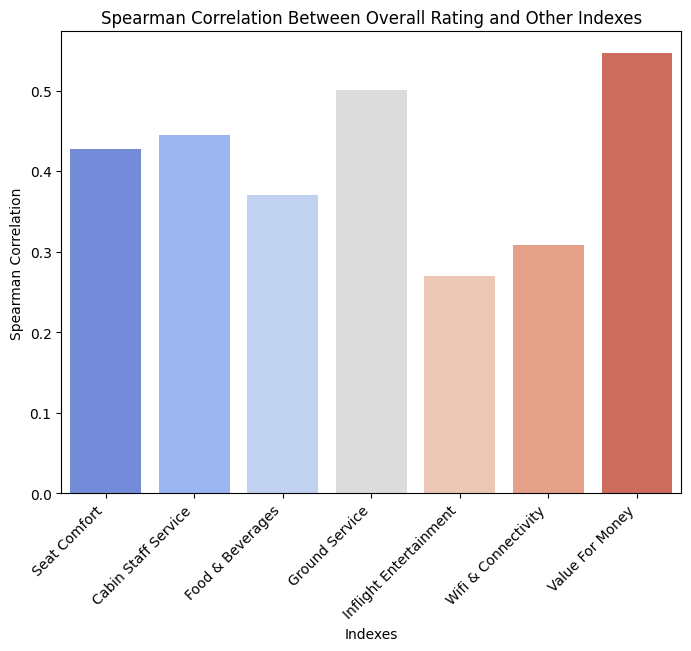

In [78]:
# Correlation between Overall Rating and Other Indexes that received Rating
# Spearman´s Rank Correlation: measures the strength and direction of monotinic relationships between variables which works better with ordinal data

# Select Overall Rating and the other indexes for correlation calculation
overall_rating_corr = my_data_cleaned[['Overall Rating', 'Seat Comfort', 'Cabin Staff Service',
                                      'Food & Beverages', 'Ground Service', 'Inflight Entertainment',
                                      'Wifi & Connectivity', 'Value For Money']].corr(method='spearman')

# Extract just the correlation values for "Overall Rating" with the other indexes
overall_rating_corr = overall_rating_corr['Overall Rating'].drop('Overall Rating')

# Create a bar plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.barplot(x=overall_rating_corr.index, y=overall_rating_corr.values, palette='coolwarm')
plt.title('Spearman Correlation Between Overall Rating and Other Indexes')
plt.xlabel('Indexes')
plt.ylabel('Spearman Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
# Removing all Airlines from which exist less reviews then the average amount

# Group by 'Airline' and count the occurrences
airline_counts = my_data_cleaned.groupby('Airline Name').size()
# Calculate the average count
average_count = airline_counts.mean()

# # Filter airlines that appear more than the average count
valid_airlines = airline_counts[airline_counts > average_count].index
# # Filter the original data to only include valid airlines
filtered_data_1 = my_data_cleaned[my_data_cleaned['Airline Name'].isin(valid_airlines)]

#Removed Airline Names
removed_data = airline_counts[airline_counts < average_count].index

In [84]:
# Duplicating dataframe for:
#1: desriptive statistiics
#2: ML and DL Models

filtered_data = filtered_data_1.copy()

##**2.2  Data Cleaning for Visualization**


In [82]:
# DATA PREPARATION for Visualization:

# Download the 'stopwords' resource
nltk.download('stopwords')

#Load spaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# INTENSE CLEANING:

# Function that runs through all reviews and prepares them for modelling:
def preprocess_text(text):

    text = text.lower().strip() # Convert to lowercase

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize and lemmatize
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text.lower() not in stop_words]
    return ' '.join(tokens)

filtered_data_1.loc[:, 'Cleaned Review'] = filtered_data_1['Review'].apply(preprocess_text)

<ipython-input-86-744dda5ef497>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1.loc[:, 'Cleaned Review'] = filtered_data_1['Review'].apply(preprocess_text)


#**3. Descriptive Statistics**

---




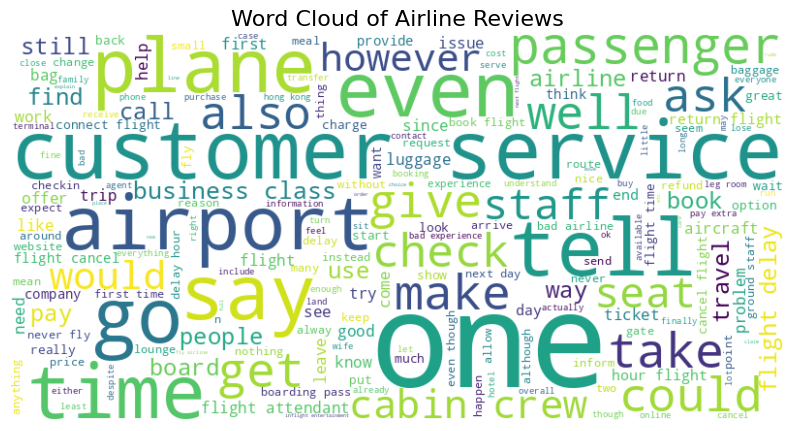

In [87]:
#VISUAL REPRESENTATION:

#Wordcloud showing the most used words in general
text = " ".join(str(review) for review in filtered_data_1['Cleaned Review'].dropna())

# Definiton of Wordcloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords=stop_words,
    colormap="viridis",
    max_words=200
).generate(text)

# Plotting graph
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Airline Reviews", fontsize=16)
plt.show()

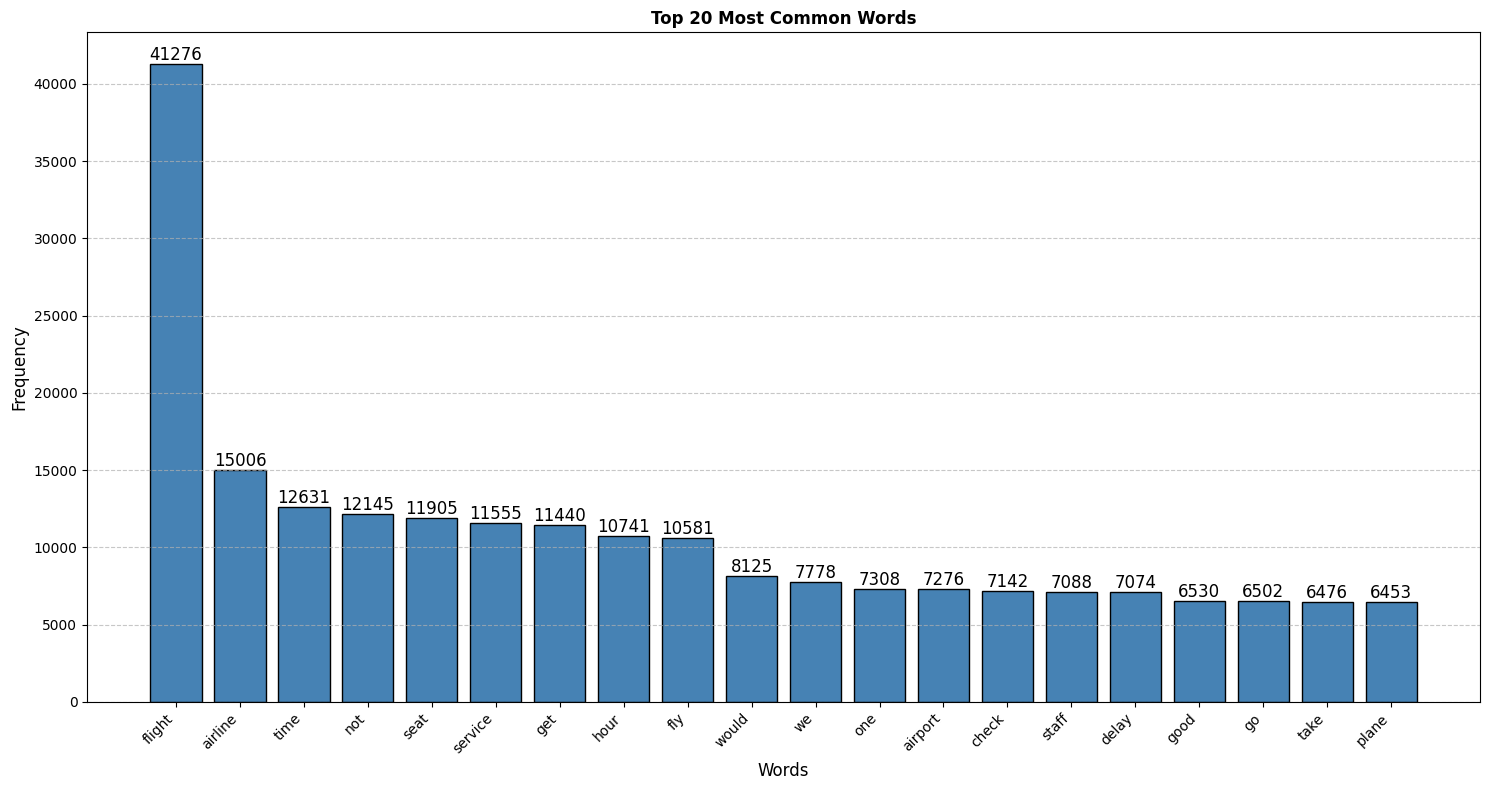

In [88]:
# Graph of Top 20 Most Common Words in the Reviews

# Combine all cleaned reviews into a single string and split into words
all_words = ' '.join(filtered_data_1['Cleaned Review'].dropna()).split()

# Count word frequencies
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Extract words and their frequencies
words = [word[0] for word in common_words]
counts = [word[1] for word in common_words]

# Plot the bar chart
plt.figure(figsize=(15, 8))
bars = plt.bar(words, counts, color='steelblue', edgecolor='black')

# Add titles and labels
plt.title('Top 20 Most Common Words', fontsize=12, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Annotate bars with their frequency
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, int(bar.get_height()), ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#**4. Sentiment Score - VADER**

---

In [89]:
#Data Cleaning for VADER

# Unified cleaning function for VADER and BERT
def preprocess_text_unified(text):
    # Remove extra spaces and leading/trailing whitespace
    text = text.strip()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    return text

# Apply cleaning to the 'Review' column
filtered_data['Cleaned Review'] = filtered_data['Review'].apply(preprocess_text_unified)

##**4.1. Train-Test-Split**


In [90]:
# SPLTTING Datasets

# First, split into train (70%) and temp (30%) where temp will later be divided into validation and test sets
train_data, temp_data = train_test_split(filtered_data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the size of each set to confirm the 70-15-15 split
print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

Train data size: 13336
Validation data size: 2858
Test data size: 2858


In [91]:
# Implementation of VADER:

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to all datasets (train, validation, and test)
train_data['Sentiment Score'] = train_data['Cleaned Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
val_data['Sentiment Score'] = val_data['Cleaned Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
test_data['Sentiment Score'] = test_data['Cleaned Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Classify sentiment into positive or negative only
def classify_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'positive'  # on purpose positive to make the bias smaller

# Apply classification to each dataset (train, validation, and test)
train_data['Text Sentiment'] = train_data['Sentiment Score'].apply(classify_sentiment)
val_data['Text Sentiment'] = val_data['Sentiment Score'].apply(classify_sentiment)
test_data['Text Sentiment'] = test_data['Sentiment Score'].apply(classify_sentiment)

print(f"Sentiment distribution in Train data: {train_data['Text Sentiment'].value_counts()}")
print(f"Sentiment distribution in Validation data: {val_data['Text Sentiment'].value_counts()}")
print(f"Sentiment distribution in Test data: {test_data['Text Sentiment'].value_counts()}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment distribution in Train data: Text Sentiment
negative    7125
positive    6211
Name: count, dtype: int64
Sentiment distribution in Validation data: Text Sentiment
negative    1507
positive    1351
Name: count, dtype: int64
Sentiment distribution in Test data: Text Sentiment
negative    1526
positive    1332
Name: count, dtype: int64


##**4.2 Sentiment Statistics**


In [104]:
# Printing the Sentiment Score column
train_data["Sentiment Score"].head()

,Sentiment Score
Row Number,
10808,0.5586
15500,-0.7903
9730,-0.7269
18325,-0.8124
2024,0.7351


In [142]:
# Create a new DataFrame that contains the relevant columns for analysis
sentiment_analysis = train_data[['Text Sentiment', 'Overall Rating', 'Seat Comfort',
                                 'Wifi & Connectivity', 'Value For Money',
                                 'Cabin Staff Service','Ground Service', 'Inflight Entertainment',
                                 'Food & Beverages', 'Sentiment Score']]

# Group by 'Text Sentiment' and calculate descriptive statistics for each feature
sentiment_counts = sentiment_analysis.groupby('Text Sentiment').describe()
print(sentiment_counts)


               Overall Rating                                               \
                        count      mean       std  min  25%  50%  75%  max   
Text Sentiment                                                               
negative               7125.0  1.765614  1.470875  1.0  1.0  1.0  2.0  9.0   
positive               6211.0  4.516342  3.293215  1.0  1.0  4.0  8.0  9.0   

               Seat Comfort                                               \
                      count      mean       std  min  25%  50%  75%  max   
Text Sentiment                                                             
negative             6136.0  1.884289  1.083163  0.0  1.0  1.0  3.0  5.0   
positive             5475.0  3.435982  1.376131  0.0  3.0  4.0  5.0  5.0   

               Wifi & Connectivity                                          \
                             count      mean       std  min  25%  50%  75%   
Text Sentiment                                                          

In [148]:
# Showing the last rows of the train dataset to check changes made after VADER

# Set max column width to show only the beginning of each review
pd.set_option('display.max_colwidth', 50)
train_data.tail()

,Airline Name,Overall Rating,Review Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Review_Length,Cleaned Review,Sentiment Score,Text Sentiment,Label
Row Number,,,,,,,,,,,,,,,,,,,,,,,,
13705,Level,1.0,"""showcased a lack of ethics""",5th November 2018,True,I purchased a return ticket Newark to Paris ...,NaN,Solo Leisure,Economy Class,Newark to Paris Orly,10/1/2018,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,3489,I purchased a return ticket Newark to Paris Or...,0.8670,positive,1
14558,Malindo Air,1.0,"""lost my baggage""",6th February 2020,True,Perth to Trivandrum via Kuala Lumpur. Worst ...,NaN,Family Leisure,Economy Class,Perth to Trivandrum via Kuala Lumpur,1/1/2020,1.0,1.0,NaN,1.0,1.0,NaN,1.0,no,261,Perth to Trivandrum via Kuala Lumpur. Worst fl...,-0.8020,negative,0
6786,Cebu Pacific,1.0,"""This airline is ridiculous""",13th March 2020,True,This airline is ridiculous. This is somethin...,NaN,Business,Economy Class,Manila to Dubai,3/1/2020,NaN,NaN,NaN,1.0,NaN,NaN,1.0,no,661,This airline is ridiculous. This is something ...,-0.7458,negative,0
1077,Air Berlin,5.0,"""I wish they had been nicer""",2nd December 2016,False,Bought my ticket one day in advance for $122 f...,A321,Solo Leisure,Economy Class,TXL to DUS,11/1/2016,2.0,2.0,NaN,2.0,NaN,NaN,3.0,no,1012,Bought my ticket one day in advance for $122 f...,0.9077,positive,1
19346,Sunwing Airlines,1.0,"""Sunwing will not be our carrier""",21st February 2022,False,It seems Sunwing does everything in it's pow...,Boeing 737-800,Couple Leisure,Economy Class,Santa Clara to Ottawa,2/1/2022,3.0,3.0,2.0,3.0,NaN,NaN,2.0,no,653,It seems Sunwing does everything in it's power...,-0.9042,negative,0


In [149]:
#Statistical Description of train data
# Overall Rating: 1-9
# Other Indexes: 1-5

train_data.describe()

,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Review_Length,Sentiment Score,Label
count,13336.000000,11611.000000,11549.000000,8925.000000,11386.000000,6794.000000,3839.000000,13208.000000,13336.000000,13336.000000,13336.000000
mean,3.046716,2.615968,2.866655,2.557311,2.326454,2.262143,1.798125,2.425348,737.687088,-0.035411,0.465732
std,2.844157,1.453577,1.594355,1.507635,1.589700,1.481727,1.324848,1.584031,553.458188,0.780051,0.498843
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,14.000000,-0.998700,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,364.000000,-0.828350,0.000000
50%,1.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,570.000000,-0.218700,0.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000,927.250000,0.855800,1.000000
max,9.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5080.000000,0.999300,1.000000


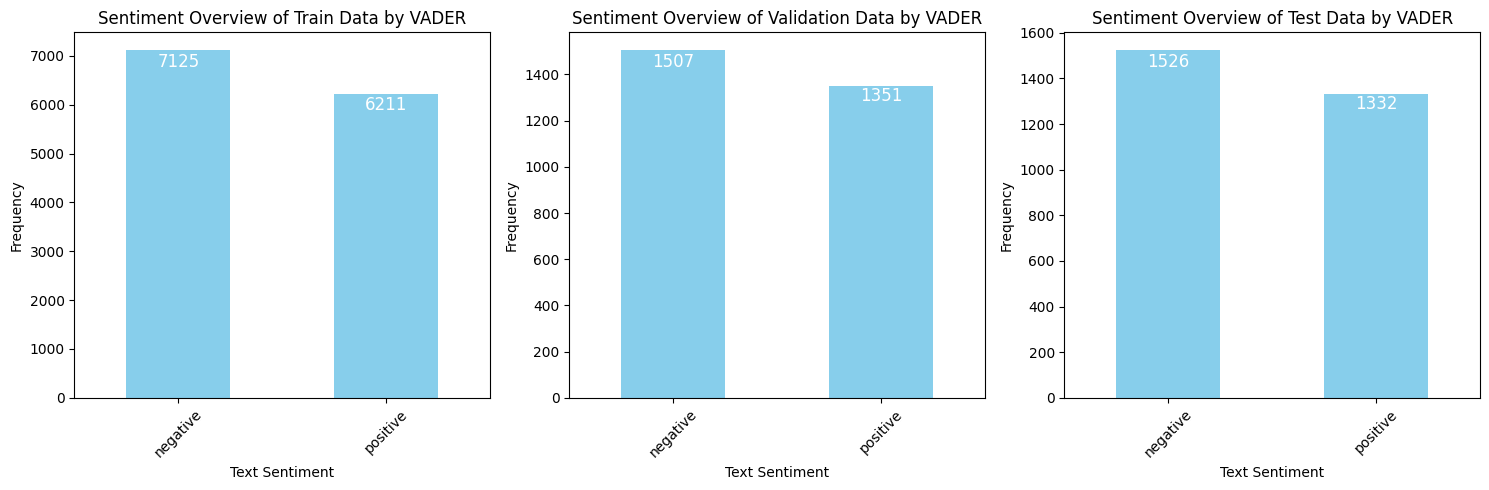

In [150]:
# Create subplots to display all three bar plots side by side

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot sentiment distribution for Train data
train_counts = train_data["Text Sentiment"].value_counts()
train_counts.plot.bar(ax=axes[0], color='skyblue')
axes[0].set_ylabel("Frequency")
axes[0].set_title("Sentiment Overview of Train Data by VADER")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Display counts inside the bars
for i, count in enumerate(train_counts):
    axes[0].text(i, count - count * 0.05, str(count), ha='center', color='white', fontsize=12)

# Plot sentiment distribution for Validation data
val_counts = val_data["Text Sentiment"].value_counts()
val_counts.plot.bar(ax=axes[1], color='skyblue')
axes[1].set_ylabel("Frequency")
axes[1].set_title("Sentiment Overview of Validation Data by VADER")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Display counts inside the bars
for i, count in enumerate(val_counts):
    axes[1].text(i, count - count * 0.05, str(count), ha='center', color='white', fontsize=12)

# Plot sentiment distribution for Test data
test_counts = test_data["Text Sentiment"].value_counts()
test_counts.plot.bar(ax=axes[2], color='skyblue')
axes[2].set_ylabel("Frequency")
axes[2].set_title("Sentiment Overview of Test Data by VADER")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)

# Display counts inside the bars
for i, count in enumerate(test_counts):
    axes[2].text(i, count - count * 0.05, str(count), ha='center', color='white', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [131]:
# Check for missing values in 'Text Sentiment' and 'Cleaned Review' columns for train data
missing_values_train = train_data[['Text Sentiment', 'Cleaned Review']].isnull().sum()
print("Missing values in Train Data:")
print(missing_values_train)

# Check for missing values in 'Text Sentiment' and 'Cleaned Review' columns for validation data
missing_values_val = val_data[['Text Sentiment', 'Cleaned Review']].isnull().sum()
print("\nMissing values in Validation Data:")
print(missing_values_val)

# Check for missing values in 'Text Sentiment' and 'Cleaned Review' columns for test data
missing_values_test = test_data[['Text Sentiment', 'Cleaned Review']].isnull().sum()
print("\nMissing values in Test Data:")
print(missing_values_test)

Missing values in Train Data:
Text Sentiment    0
Cleaned Review    0
dtype: int64

Missing values in Validation Data:
Text Sentiment    0
Cleaned Review    0
dtype: int64

Missing values in Test Data:
Text Sentiment    0
Cleaned Review    0
dtype: int64


##**4.3 Binary Classification**


In [132]:
#Binary Classification
# Assuming `Text Sentiment` column contains 'positive' and 'negative'

# Map 'positive' to 1 and 'negative' to 0 in the train dataset
train_data['Label'] = train_data['Text Sentiment'].map({'positive': 1, 'negative': 0})
print("Train Data Label (Last few rows):")
print(train_data["Label"].tail())

# Map 'positive' to 1 and 'negative' to 0 in the validation dataset
val_data['Label'] = val_data['Text Sentiment'].map({'positive': 1, 'negative': 0})
print("\nValidation Data Label (Last few rows):")
print(val_data["Label"].tail())

# Map 'positive' to 1 and 'negative' to 0 in the test dataset
test_data['Label'] = test_data['Text Sentiment'].map({'positive': 1, 'negative': 0})
print("\nTest Data Label (Last few rows):")
print(test_data["Label"].tail())

Train Data Label (Last few rows):
Row Number
13705    1
14558    0
6786     0
1077     1
19346    0
Name: Label, dtype: int64

Validation Data Label (Last few rows):
Row Number
15830    0
19232    0
36       1
17406    1
2522     0
Name: Label, dtype: int64

Test Data Label (Last few rows):
Row Number
9493     1
19201    0
4294     0
10410    1
18796    1
Name: Label, dtype: int64


In [133]:
# Proportions of Reviews in different Datasets

print("Train Data Proportions:")
print(train_data["Label"].value_counts(normalize=True))

print("\nValidation Data Proportions:")
print(val_data["Label"].value_counts(normalize=True))

print("\nTest Data Proportions:")
print(test_data["Label"].value_counts(normalize=True))

Train Data Proportions:
Label
0    0.534268
1    0.465732
Name: proportion, dtype: float64

Validation Data Proportions:
Label
0    0.527292
1    0.472708
Name: proportion, dtype: float64

Test Data Proportions:
Label
0    0.53394
1    0.46606
Name: proportion, dtype: float64


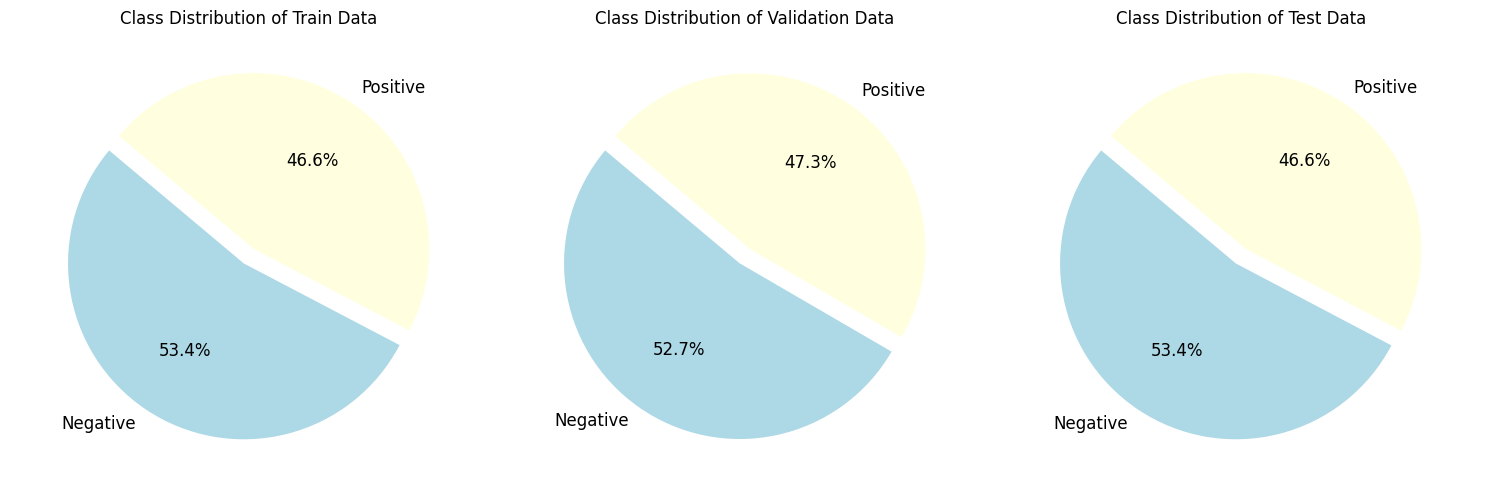

In [134]:
# Pie Charts of Sentiments in Dataset

# Create subplots to display all three pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Train Data Pie Chart
train_sizes = train_data["Label"].value_counts(normalize=True)
axes[0].pie(train_sizes, labels=['Negative', 'Positive'], colors=['lightblue', 'lightyellow'],
            explode=(0.05, 0.05), autopct='%1.1f%%', startangle=140,
            textprops={'fontsize': 12})
axes[0].set_title('Class Distribution of Train Data')
axes[0].axis('equal')

# Validation Data Pie Chart
val_sizes = val_data["Label"].value_counts(normalize=True)
axes[1].pie(val_sizes, labels=['Negative', 'Positive'], colors=['lightblue', 'lightyellow'],
            explode=(0.05, 0.05), autopct='%1.1f%%', startangle=140,
            textprops={'fontsize': 12})
axes[1].set_title('Class Distribution of Validation Data')
axes[1].axis('equal')

# Test Data Pie Chart
test_sizes = test_data["Label"].value_counts(normalize=True)
axes[2].pie(test_sizes, labels=['Negative', 'Positive'], colors=['lightblue', 'lightyellow'],
            explode=(0.05, 0.05), autopct='%1.1f%%', startangle=140,
            textprops={'fontsize': 12})
axes[2].set_title('Class Distribution of Test Data')
axes[2].axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

In [135]:
# Duplicate the train_data into two separate datasets:

train_data_naive_bayes = train_data.copy()  # For Naive Bayes
train_data_bert = train_data.copy()         # For BERT (no resampling)

#**5. Machine Learning Model: Naive Bayes**


---



In [136]:
#Preparation for Naive Bayes:

# Using RandomOverSampler to balance classes in the train data for Naive Bayes
ros = RandomOverSampler(random_state=2021)
train_resampled_x, train_resampled_y = ros.fit_resample(
    train_data_naive_bayes[['Cleaned Review']],
    train_data_naive_bayes['Label']
)

# Convert the resampled data back to a DataFrame
train_resampled = pd.DataFrame({
    'Cleaned Review': train_resampled_x['Cleaned Review'],
    'Label': train_resampled_y
})

# Verify the class distribution after oversampling for Naive Bayes
print("Naive Bayes resampled class distribution:")
print(train_resampled["Label"].value_counts())

# Verify the shape of the resampled training data for Naive Bayes
print("Train shape for Naive Bayes:", train_resampled.shape)

Naive Bayes resampled class distribution:
Label
1    7125
0    7125
Name: count, dtype: int64
Train shape for Naive Bayes: (14250, 2)


In [137]:
#Naive Bayes

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the train data for Naive Bayes and transform the validation and test data
X_train_tfidf = vectorizer.fit_transform(train_resampled["Cleaned Review"])
X_valid_tfidf = vectorizer.transform(val_data["Cleaned Review"])
X_test_tfidf = vectorizer.transform(test_data["Cleaned Review"])

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train_tfidf, train_resampled["Label"])

# Make predictions on test data
y_pred = nb_model.predict(X_test_tfidf)

##**5.2. NAIVE BAYES Perfomance Metrics for Test Dataset**


In [138]:
#Checking for OVERFITTING

# Train Naive Bayes model on the training set
nb_model.fit(X_train_tfidf, train_resampled["Label"])

# Make predictions on both the training and test data
y_train_pred = nb_model.predict(X_train_tfidf)  # Predictions on training data
y_test_pred = nb_model.predict(X_test_tfidf)  # Predictions on test data

# Calculate the accuracy for both the training and test data
train_accuracy = accuracy_score(train_resampled["Label"], y_train_pred)
test_accuracy = accuracy_score(test_data['Label'], y_test_pred)

# Print the accuracy results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Print classification reports for both training and test predictions
print("\nClassification Report for Training Data:")
print(classification_report(train_resampled["Label"], y_train_pred, target_names=["negative", "positive"]))

print("\nClassification Report for Test Data:")
print(classification_report(test_data['Label'], y_test_pred, target_names=["negative", "positive"]))

# Check for overfitting:
# If training accuracy is much higher than test accuracy, it might indicate overfitting
if train_accuracy > test_accuracy:
    print("\nWarning: The model might be overfitting. Training accuracy is higher than test accuracy.")
else:
    print("\nThe model is generalizing well. No sign of overfitting.")


Training Accuracy: 0.8236491228070175
Test Accuracy: 0.7998600419874038

Classification Report for Training Data:
              precision    recall  f1-score   support

    negative       0.79      0.88      0.83      7125
    positive       0.87      0.77      0.81      7125

    accuracy                           0.82     14250
   macro avg       0.83      0.82      0.82     14250
weighted avg       0.83      0.82      0.82     14250


Classification Report for Test Data:
              precision    recall  f1-score   support

    negative       0.79      0.85      0.82      1526
    positive       0.81      0.74      0.78      1332

    accuracy                           0.80      2858
   macro avg       0.80      0.80      0.80      2858
weighted avg       0.80      0.80      0.80      2858




#**6. Deep Learning Model: BERT**


---



In [ ]:
#Installing evalute, library of HuggingFaces for calculating performance metrics
!pip install evaluate

In [140]:
#Definiton of functions

#Model will run on GPU and if that is full it will run on CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define a custom dataset
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts                                      # List of input texts
        self.labels = torch.tensor(labels, dtype=torch.long)    # Converts labels to tensors
        self.tokenizer = tokenizer                              # Pretrained BERT tokenizer
        self.max_length = max_length                            # Max token length for each input

    def __len__(self):
        return len(self.texts)          # Return total number of samples

    # Tokenize the text at the given index with padding/truncation
    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,            # cut off text when reached max length
            padding="max_length",       # pads shorter texts to max length
            max_length=self.max_length,
            return_tensors="pt"         # return as PyTorch tensors
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}
        encoding["labels"] = self.labels[idx]   # Add the label to the dictionary
        return encoding


# Function to load a pretrained BERT model and tokenizer
def load_model(model_name):
    """Load the sentiment analysis model and tokenizer from HuggingFace Hub.
       Adds dropout to reduce overfitting."""
    try:
        model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2,           # Binary classification
                                                                   attention_probs_dropout_prob=0.3,   # Dropout in attention layers
                                                                   hidden_dropout_prob=0.3,            # Dropout in hidden layers
                                                                   classifier_dropout=0.3).to(device)  # Adding Dropout and move to GPU if available
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        print(f"Model and tokenizer loaded successfully from {model_name}")
        return model, tokenizer
    except Exception as e:
        print(f"Error loading model: {e}")
        raise

# Function to compute evaluation metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1).tolist()                       # Convert logits to predicted class labels
    metric = load("accuracy")                                         # Accuracy
    accuracy = metric.compute(predictions=preds, references=labels)

    f1_metric = load("f1")                                            # Macro F1 (treats all classes equally)
    f1_macro = f1_metric.compute(predictions=preds, references=labels, average="macro")

    return {
        "accuracy": accuracy["accuracy"],
        "f1_macro": f1_macro["f1"]
    }



Using device: cuda


##**6.1. BERT Fine-Tuning Process**


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Model and tokenizer loaded successfully from bert-base-uncased
Starting training...


  0%|          | 0/1668 [00:00<?, ?it/s]

Epoch 1 - Training Accuracy: 0.8492, Validation Accuracy: 0.8653
New best model saved to /content/drive/MyDrive/ColabNotebooks/Models/best_fine_tuned_bert with accuracy: 0.8653
Epoch 2 - Training Accuracy: 0.9009, Validation Accuracy: 0.9010
New best model saved to /content/drive/MyDrive/ColabNotebooks/Models/best_fine_tuned_bert with accuracy: 0.9010
Training complete.


Final Evaluation Accuracy: 0.9010


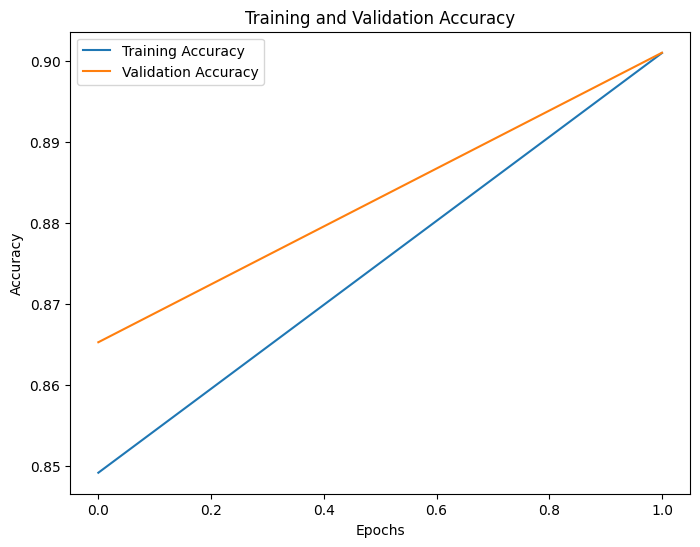

In [ ]:
if __name__ == '__main__':
    try:
        # Use train_data_bert for BERT
        train_texts = train_data_bert["Cleaned Review"].tolist()
        train_labels = train_data_bert["Label"].tolist()

        valid_texts = val_data["Cleaned Review"].tolist()  # Assuming valid_data is pre-split
        valid_labels = val_data["Label"].tolist()

        test_texts = test_data["Cleaned Review"].tolist()  # Assuming test_data is pre-split
        test_labels = test_data["Label"].tolist()

        # Load model and tokenizer
        model_name = 'bert-base-uncased'
        model, tokenizer = load_model(model_name)

        # Prepare datasets
        train_dataset = SentimentDataset(train_texts, train_labels, tokenizer)
        eval_dataset = SentimentDataset(valid_texts, valid_labels, tokenizer)
        test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)

        # Create DataLoaders
        train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
        eval_dataloader = DataLoader(eval_dataset, batch_size=16, shuffle=False)

        #Saving the Model
        # Define the model save path in your Google Drive
        model_save_path = "/content/drive/MyDrive/ColabNotebooks/Models/best_fine_tuned_bert"
        # Ensure the directory exists
        os.makedirs(model_save_path, exist_ok=True)


        # FINE TUNING
        from torch.optim.lr_scheduler import ReduceLROnPlateau

        # Set up optimizer and scheduler
        optimizer = AdamW(model.parameters(), lr=3e-5, weight_decay=0.01)

        # Set up ReduceLROnPlateau scheduler: Reduce learning rate when validation accuracy plateaus
        scheduler = ReduceLROnPlateau(optimizer, mode='max', patience=2, factor=0.1, verbose=True)

        num_epochs = 2
        num_training_steps = num_epochs * len(train_dataloader)

        # Initialize the best validation accuracy tracking
        best_eval_accuracy = 0.0

        model.to(device)

        # Initialize lists to store accuracies for plotting
        train_accuracies = []
        eval_accuracies = []

        # Training loop
        print("Starting training...")
        progress_bar = tqdm(range(num_training_steps))
        model.train()

        for epoch in range(num_epochs):
            # Track train accuracy for this epoch
            correct_preds_train = 0
            total_preds_train = 0

            for batch in train_dataloader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                loss = outputs.loss
                loss.backward()

                optimizer.step()
                optimizer.zero_grad()
                progress_bar.update(1)

                # Track accuracy during training
                preds = torch.argmax(outputs.logits, dim=-1)
                correct_preds_train += (preds == batch["labels"]).sum().item()
                total_preds_train += preds.size(0)

            # Calculate training accuracy for this epoch
            train_accuracy = correct_preds_train / total_preds_train
            train_accuracies.append(train_accuracy)

            # After each epoch, evaluate on the validation set
            model.eval()
            correct_preds_eval = 0
            total_preds_eval = 0
            all_predictions = []
            all_labels = []

            for batch in eval_dataloader:
                batch = {k: v.to(device) for k, v in batch.items()}
                with torch.no_grad():
                    outputs = model(**batch)

                logits = outputs.logits
                predictions = torch.argmax(logits, dim=-1)

                correct_preds_eval += (predictions == batch["labels"]).sum().item()
                total_preds_eval += predictions.size(0)

                all_predictions.extend(predictions.cpu().numpy())
                all_labels.extend(batch["labels"].cpu().numpy())

            # Calculate validation accuracy for this epoch
            eval_accuracy = correct_preds_eval / total_preds_eval
            eval_accuracies.append(eval_accuracy)

            print(f"Epoch {epoch + 1} - Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {eval_accuracy:.4f}")

            # Track the best validation accuracy
            if eval_accuracy > best_eval_accuracy:
                best_eval_accuracy = eval_accuracy
                model.save_pretrained(model_save_path)
                tokenizer.save_pretrained(model_save_path)
                print(f"New best model saved to {model_save_path} with accuracy: {best_eval_accuracy:.4f}")

            # Step the scheduler with the validation accuracy
            scheduler.step(eval_accuracy)  # Use validation accuracy for scheduler step

            model.train()  # Return to training mode after evaluation

        print("Training complete.")

        # Final evaluation on the test set
        metric = evaluate.load("accuracy")
        model.eval()
        all_predictions = []
        all_labels = []

        for batch in eval_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

        final_accuracy = metric.compute(predictions=all_predictions, references=all_labels)
        print(f"Final Evaluation Accuracy: {final_accuracy['accuracy']:.4f}")

        # Plotting Training and Validation Accuracy
        plt.figure(figsize=(8, 6))
        plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
        plt.plot(range(num_epochs), eval_accuracies, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"An error occurred: {str(e)}")

        # Save the model and tokenizer if an error occurs (optional)
        model.save_pretrained(model_save_path)
        tokenizer.save_pretrained(model_save_path)


        # Evaluation
        model.eval()
        correct_preds_eval = 0
        total_preds_eval = 0
        all_predictions = []
        all_labels = []

        for batch in eval_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)

            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)

            correct_preds_eval += (predictions == batch["labels"]).sum().item()
            total_preds_eval += predictions.size(0)

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

        # Calculate validation accuracy for this epoch
        eval_accuracy = correct_preds_eval / total_preds_eval
        eval_accuracies.append(eval_accuracy)

        final_accuracy = metric.compute(predictions=all_predictions, references=all_labels)
        print(f"Evaluation Accuracy: {final_accuracy['accuracy']:.4f}")

##**6.2. BERT Performance Metrics for Validation Dataset**


In [ ]:
# Classification Report for Bert Model
print("\nClassification Report for BERT Model:\n")
print(classification_report(all_labels, all_predictions))


Classification Report for BERT Model:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1507
           1       0.88      0.91      0.90      1351

    accuracy                           0.90      2858
   macro avg       0.90      0.90      0.90      2858
weighted avg       0.90      0.90      0.90      2858



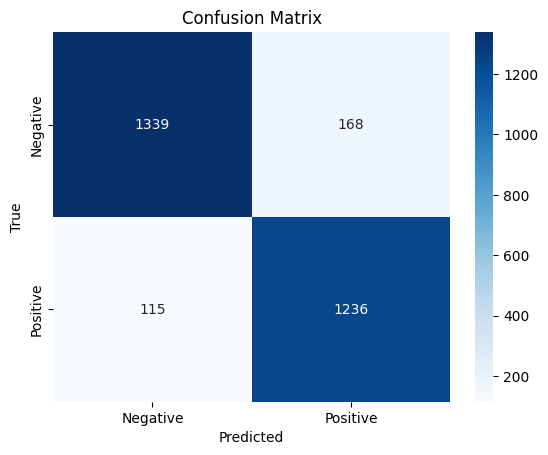

In [ ]:
# Confusion Matrix

cm = confusion_matrix(all_labels, all_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

#Plot the graph
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Printing first rows of Test Dataset
test_data.head()

,Airline Name,Overall Rating,Review Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,...,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Cleaned Review,Sentiment Score,Text Sentiment,Label
Row Number,,,,,,,,,,,,,,,,,,,,,
22456,Volotea,8.0,"""I am very satisfied""",31st December 2022,True,"Flight on time, arrived even with 20 min adv...",A319,Couple Leisure,Economy Class,Nantes to Toulouse,...,3.0,5.0,3.0,3.0,5.0,yes,"Flight on time, arrived even with 20 min advan...",0.6361,positive,1
15489,Oman Air,1.0,"""complete and utter disgrace""",2nd July 2020,True,"Oman Air is, quite simply, a complete and ut...",NaN,Couple Leisure,Economy Class,Amman to Muscat,...,NaN,NaN,NaN,NaN,1.0,no,"Oman Air is, quite simply, a complete and utte...",-0.7160,negative,0
7674,Croatia Airlines,7.0,"""better experience than budget""",12th March 2017,False,London Heathrow to Zagreb. I fly often betwee...,A319,Solo Leisure,Economy Class,London Heathrow to Zagreb,...,4.0,4.0,NaN,NaN,4.0,yes,London Heathrow to Zagreb. I fly often between...,0.9843,positive,1
15356,Olympic Air,9.0,"""better service, lower price""",19th November 2018,True,Direct flight a new service from Athens to Ca...,NaN,Business,Economy Class,Athens to Catania,...,5.0,5.0,3.0,3.0,5.0,yes,Direct flight a new service from Athens to Cat...,0.1779,positive,1
14443,Malaysia Airlines,1.0,"""they served meals free""",20th February 2023,True,I didn't expect that I would get a meal for ...,NaN,Solo Leisure,Economy Class,Bangkok to Incheon via Kuala Lumpur,...,5.0,5.0,5.0,5.0,5.0,yes,I didn't expect that I would get a meal for 2 ...,0.9922,positive,1


##**6.3. Overfitting Detection**


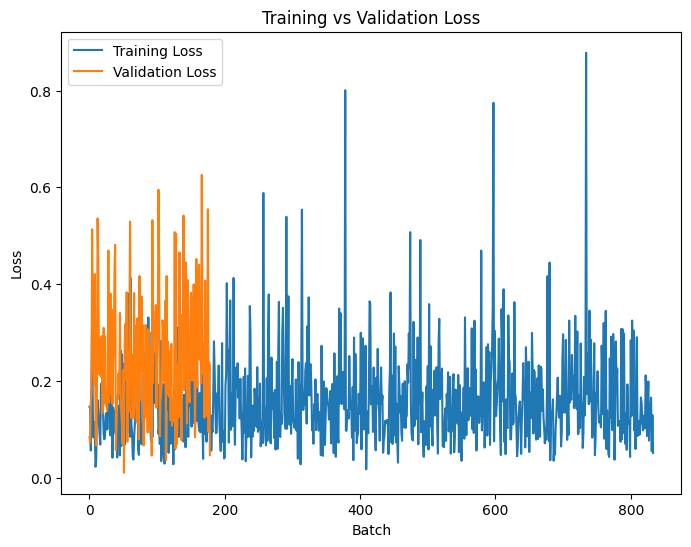

Final Training Loss: 0.1608
Final Validation Loss: 0.2443


In [32]:
#Checking for OVERFITTING with loss function

# Load the saved model and tokenizer
model_name = "/content/drive/MyDrive/ColabNotebooks/Models/best_fine_tuned_bert"  # Path to your saved model
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
model.to(device)
model.eval()  # Set model to evaluation mode

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Function to compute loss on a dataset
def compute_loss(dataloader):
    total_loss = 0
    total_samples = 0
    all_losses = []

    with torch.no_grad():  # No need for gradient calculation
        for batch in dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            labels = batch["labels"]

            # Compute loss
            loss = loss_fn(logits, labels)
            total_loss += loss.item() * logits.size(0)  # Multiply by batch size
            total_samples += logits.size(0)
            all_losses.append(loss.item())  # Store per-batch loss

    # Compute average loss
    avg_loss = total_loss / total_samples
    return avg_loss, all_losses

# Compute loss for training and validation sets
train_loss, train_losses = compute_loss(train_dataloader)
val_loss, val_losses = compute_loss(eval_dataloader)

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(len(train_losses)), train_losses, label="Training Loss")
plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Print final average losses
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

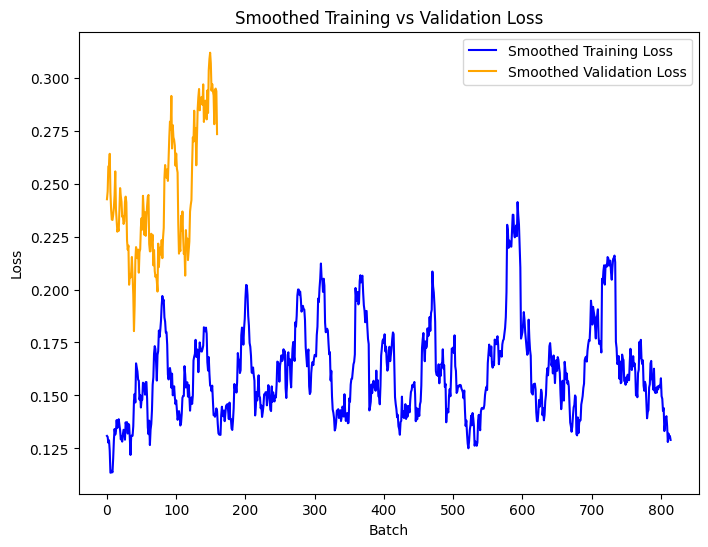

In [34]:
#Smoothing the CrossEntryLoss Function for better visualization

def moving_average(data, window_size=20):
    """Computes the moving average for smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Apply smoothing
window_size = 20  # You can adjust this for more or less smoothing
train_losses_smooth = moving_average(train_losses, window_size)
val_losses_smooth = moving_average(val_losses, window_size)

# Plot smoothed loss curves
plt.figure(figsize=(8, 6))
plt.plot(range(len(train_losses_smooth)), train_losses_smooth, label="Smoothed Training Loss", color='blue')
plt.plot(range(len(val_losses_smooth)), val_losses_smooth, label="Smoothed Validation Loss", color='orange')
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.title("Smoothed Training vs Validation Loss")
plt.legend()
plt.show()

##**6.4. BERT Performance Metrics for Test Dataset**


In [ ]:
# MODEL EVALUATION

# Load the saved model and tokenizer
model_name = "/content/drive/MyDrive/ColabNotebooks/Models/best_fine_tuned_bert"  # Path to your saved model
model = BertForSequenceClassification.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
model.to(device)
model.eval()

# Prepare the test data
test_texts = test_data["Cleaned Review"].tolist()
test_labels = test_data["Label"].tolist()

# Create a dataset and dataloader for the test set
test_dataset = SentimentDataset(test_texts, test_labels, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Initialize lists to store predictions and true labels
all_predictions = []
all_labels = []

# Iterate over the test data
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    # For binary classification, we apply argmax to get the final class
    predictions = torch.argmax(logits, dim=-1)  # Apply argmax to get the final predicted class

    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

# Add predictions to the test_data DataFrame
test_data['Predicted Label'] = all_predictions

# Print the first 5 predictions in the requested format
print("First 5 Predictions:")
for i in range(5):
    print(f"Review {i+1}:")
    print(f"Text: {test_data['Cleaned Review'].iloc[i]}")
    print(f"Predicted Sentiment: {test_data['Predicted Label'].iloc[i]}")
    print(f"Actual Sentiment: {test_data['Label'].iloc[i]}")
    print("-" * 80)  # Separator line

# Ensure both lists are binary arrays and calculate accuracy using sklearn's accuracy_score
from sklearn.metrics import accuracy_score

# Convert to numpy arrays to be sure
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Printing Accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

First 5 Predictions:
Review 1:
Text: Flight on time, arrived even with 20 min advance. Everything was well organised, from the luggage deposit to the end of the flight. I am very satisfied.
Predicted Sentiment: 1
Actual Sentiment: 1
--------------------------------------------------------------------------------
Review 2:
Text: Oman Air is, quite simply, a complete and utter disgrace. The airline treats its guests with complete contempt. Flights from Amman to Muscat and back were cancelled due to the COVID-19 pandemic and they are refusing to refund, instead keeping my money (and that of countless other customers) when planes did not even take off. The airline has adopted a policy of hoping customers will stop pestering them so they can keep their money without providing a service. They refuse to help on the phone (or hang up on you) and direct you to an e-mail address. An automatic reply to all e-mails says you may have to wait 15 days for a reply. If you get a reply, they do not help

In [ ]:
#Printing out the first rows Test Dataset, checking changes
test_data.head()

,Airline Name,Overall Rating,Review Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,...,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Cleaned Review,Sentiment Score,Text Sentiment,Label,Predicted Label
Row Number,,,,,,,,,,,,,,,,,,,,,
22456,Volotea,8.0,"""I am very satisfied""",31st December 2022,True,"Flight on time, arrived even with 20 min adv...",A319,Couple Leisure,Economy Class,Nantes to Toulouse,...,5.0,3.0,3.0,5.0,yes,"Flight on time, arrived even with 20 min advan...",0.6361,positive,1,1
15489,Oman Air,1.0,"""complete and utter disgrace""",2nd July 2020,True,"Oman Air is, quite simply, a complete and ut...",NaN,Couple Leisure,Economy Class,Amman to Muscat,...,NaN,NaN,NaN,1.0,no,"Oman Air is, quite simply, a complete and utte...",-0.7160,negative,0,0
7674,Croatia Airlines,7.0,"""better experience than budget""",12th March 2017,False,London Heathrow to Zagreb. I fly often betwee...,A319,Solo Leisure,Economy Class,London Heathrow to Zagreb,...,4.0,NaN,NaN,4.0,yes,London Heathrow to Zagreb. I fly often between...,0.9843,positive,1,1
15356,Olympic Air,9.0,"""better service, lower price""",19th November 2018,True,Direct flight a new service from Athens to Ca...,NaN,Business,Economy Class,Athens to Catania,...,5.0,3.0,3.0,5.0,yes,Direct flight a new service from Athens to Cat...,0.1779,positive,1,1
14443,Malaysia Airlines,1.0,"""they served meals free""",20th February 2023,True,I didn't expect that I would get a meal for ...,NaN,Solo Leisure,Economy Class,Bangkok to Incheon via Kuala Lumpur,...,5.0,5.0,5.0,5.0,yes,I didn't expect that I would get a meal for 2 ...,0.9922,positive,1,1


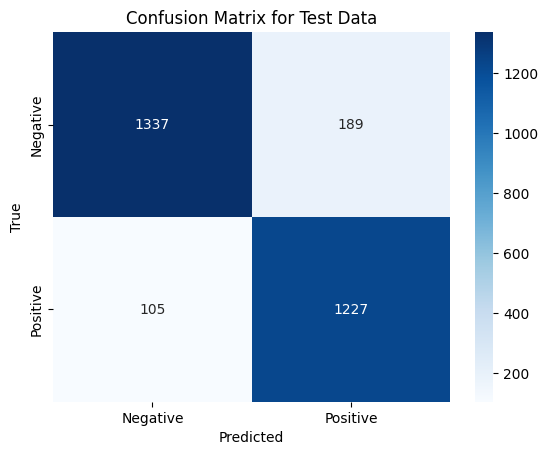

In [ ]:
#Performance Metrics for Test Dataset:

# Generate predictions on the test set (as you already did above)
all_predictions = []
all_labels = []

for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)  # For binary classification, we use argmax to get the class

    all_predictions.extend(predictions.cpu().numpy())
    all_labels.extend(batch["labels"].cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Data')
plt.show()

In [ ]:
# Classification Report
# Calculate Binary Accuracy, Precision, Recall, F1 Score

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, average='binary')
recall = recall_score(all_labels, all_predictions, average='binary')
f1 = f1_score(all_labels, all_predictions, average='binary')

# Print the performance metrics in a structured format
print("\nPerformance Metrics for BERT Model:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report for BERT Model:\n")
print(classification_report(all_labels, all_predictions))


Performance Metrics for BERT Model:

Accuracy: 0.8971
Precision: 0.8665
Recall: 0.9212
F1 Score: 0.8930

Classification Report for BERT Model:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1526
           1       0.87      0.92      0.89      1332

    accuracy                           0.90      2858
   macro avg       0.90      0.90      0.90      2858
weighted avg       0.90      0.90      0.90      2858



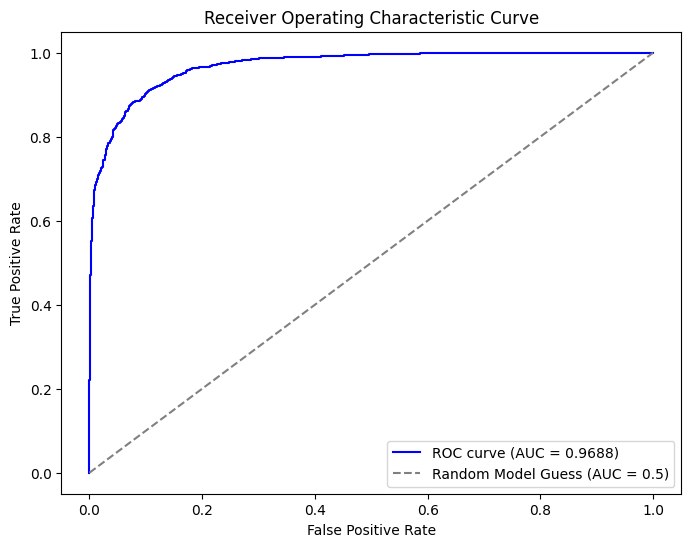

Test Set AUC: 0.9688


In [ ]:
# Plotting ROC - Receiver Operating Characteristic

# ROC: A plot showing performance of a binary classifier by comparing the TPR and FPR.
# AUC: A scalar value representing the area under the ROC curve, summarizing the overall performance of the model.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import roc_auc_score

# Initialize lists to store true labels and predicted probabilities
all_labels = []
all_probabilities = []

# Iterate over the test data to get the predicted probabilities (logits) and true labels
model.eval()  # Make sure the model is in evaluation mode
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    probabilities = torch.nn.Softmax(dim=-1)(logits)[:, 1]  # Get probability for the positive class (index 1)

    all_labels.extend(batch["labels"].cpu().numpy())  # True labels
    all_probabilities.extend(probabilities.cpu().numpy())  # Predicted probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probabilities)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.4f})')

# Plot the random guess line (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Model Guess (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"Test Set AUC: {roc_auc:.4f}")

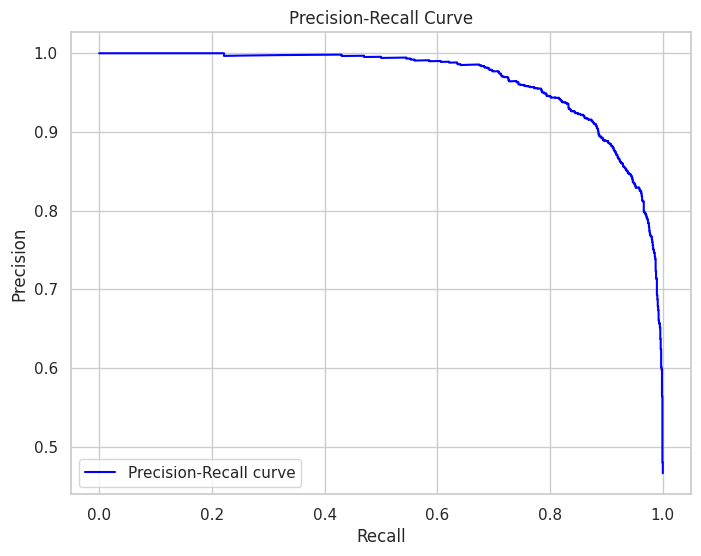

In [ ]:
#Precision-Recall Curve:

#because the ROC curve did too good maybe because of the bias in our data (more negative than pos)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted probabilities
all_labels = []
all_probabilities = []

# Iterate over the test data to get the predicted probabilities (logits) and true labels
model.eval()  # Model needs to be in evaluation mode
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    probabilities = torch.nn.Softmax(dim=-1)(logits)[:, 1]  # Get probability for the positive class (index 1)

    all_labels.extend(batch["labels"].cpu().numpy())  # True labels
    all_probabilities.extend(probabilities.cpu().numpy())  # Predicted probabilities for the positive class

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(all_labels, all_probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()